In [27]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [28]:
np.random.seed(0)

In [29]:
# Columns:
# 1. sepal length in cm
# 2. sepal width in cm
# 3. petal length in cm
# 4. petal width in cm

data = pd.read_csv("iris.data", names=["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Name"])
data["Type"] = pd.factorize(data["Name"])[0]
data = data.sample(frac=1)
data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Name,Type
114,5.8,2.8,5.1,2.4,Iris-virginica,2
62,6.0,2.2,4.0,1.0,Iris-versicolor,1
33,5.5,4.2,1.4,0.2,Iris-setosa,0
107,7.3,2.9,6.3,1.8,Iris-virginica,2
7,5.0,3.4,1.5,0.2,Iris-setosa,0


In [30]:
# Breaking up 

versicolor = data[data["Name"] == "Iris-setosa"]
versicolor = data[data["Name"] == "Iris-versicolor"]
virginica = data[data["Name"] == "Iris-virginica"]

Total Samples: 150


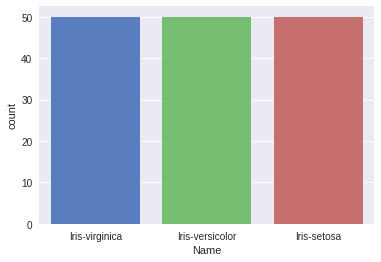

In [31]:
print("Total Samples:", len(data.index))

sns.countplot(x=data["Name"], palette="muted")

In [32]:
print("Sepal Length Mean: {0:0.2f}".format(np.mean(data["Sepal Length"])), "± {0:0.2f}".format(np.std(data["Sepal Length"])))
print("Sepal Width Mean: {0:0.2f}".format(np.mean(data["Sepal Width"])), "± {0:0.2f}".format(np.std(data["Sepal Width"])))
print("Petal Length Mean: {0:0.2f}".format(np.mean(data["Petal Length"])), "± {0:0.2f}".format(np.std(data["Petal Length"])))
print("Petal Width Mean: {0:0.2f}".format(np.mean(data["Petal Width"])), "± {0:0.2f}".format(np.std(data["Petal Width"])))

Sepal Length Mean: 5.84 ± 0.83
Sepal Width Mean: 3.05 ± 0.43
Petal Length Mean: 3.76 ± 1.76
Petal Width Mean: 1.20 ± 0.76


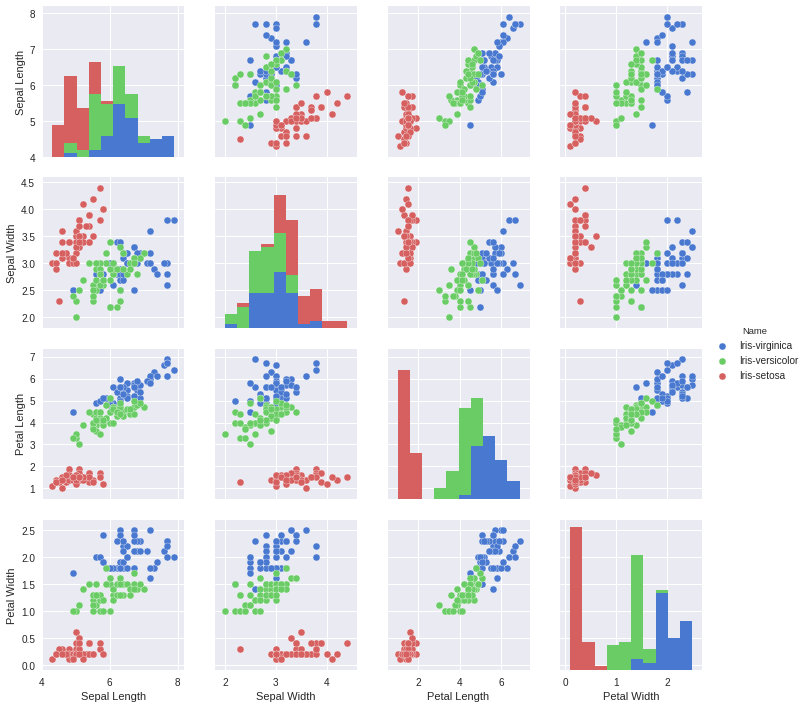

In [33]:
sns.pairplot(data, vars=["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"], hue="Name", palette="muted")

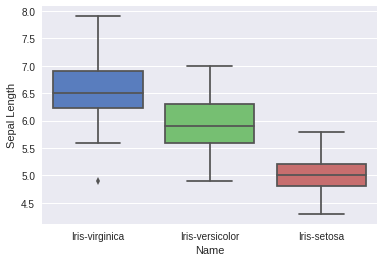

In [34]:
a = sns.boxplot(data["Name"], data["Sepal Length"], palette="muted")

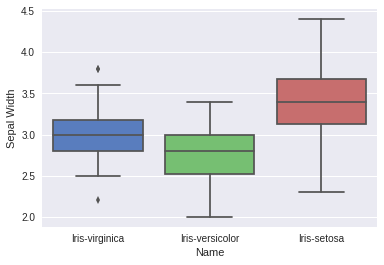

In [35]:
sns.boxplot(data["Name"], data["Sepal Width"], palette="muted")

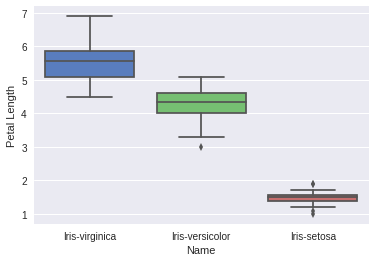

In [36]:
sns.boxplot(data["Name"], data["Petal Length"], palette="muted")

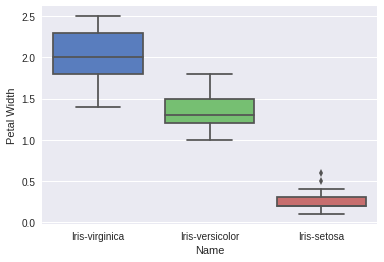

In [37]:
sns.boxplot(data["Name"], data["Petal Width"], palette="muted")

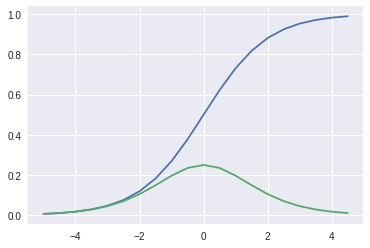

In [38]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoidPrime(x):
    return sigmoid(x) * (1-sigmoid(x))

t = np.arange(-5., 5., 0.5)
plt.plot(t, sigmoid(t))
plt.plot(t, sigmoidPrime(t))
plt.show()

In [39]:
nIn = 4
nHidden = 10
nOut = 3
alpha = 0.1
nEpochs = 500

In [40]:
def nn_forward(X, W1, W2):
    x = X.reshape(-1, nIn)
    
    layer2 = np.dot(x, W1)
    layer2 = sigmoid(layer2)
    
    out = np.dot(layer2, W2)
    out = sigmoid(out)
    
    return out

In [41]:
def train(X, Y, W1, W2):
    x = X.reshape(-1, nIn)
    Y = Y.reshape(-1, nOut)
    
    layer2 = np.dot(x, W1)
    a_layer2 = sigmoid(layer2)
    
    out = np.dot(a_layer2, W2)
    a_out = sigmoid(out)
    
    loss = np.sum(0.5 * (Y - a_out) ** 2)
    
    delta_loss = (Y - a_out) * -sigmoidPrime(out)
    delta_W2 = np.dot(layer2.T, delta_loss)
    
    delta_loss = np.dot(delta_loss, W2.T) * sigmoidPrime(layer2)
    delta_W1 = np.dot(X.T.reshape(nIn, 1), delta_loss)
    
    W2 = W2 - alpha * delta_W2
    W1 = W1 - alpha * delta_W1
    
    return W1, W2, loss

In [42]:
losses = []
W1 = np.random.rand(nIn, nHidden) * 0.5
W2 = np.random.rand(nHidden, nOut) * 0.5

In [43]:
trainX = np.asarray(data.values[:-15, :4], dtype=np.float32)
testX = np.asarray(data.values[-15:, :4], dtype=np.float32)

trainY = pd.get_dummies(data["Type"]).values[:-15]
testY = pd.get_dummies(data["Type"]).values[-15:]

Epoch 0 Loss: 0.4982009977557343
Epoch 50 Loss: 0.049805963099850754
Epoch 100 Loss: 0.0237658854918869
Epoch 150 Loss: 0.01046807478957085
Epoch 200 Loss: 0.008388530553450948
Epoch 250 Loss: 0.007740101025600147
Epoch 300 Loss: 0.006807794164100138
Epoch 350 Loss: 0.007737450970591323
Epoch 400 Loss: 0.006883642907199987
Epoch 450 Loss: 0.005287677464074482


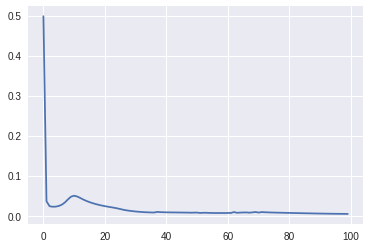

In [44]:
for j in range(nEpochs):
    for i in range(trainX.shape[0]):
        W1, W2, loss = train(trainX[i], trainY[i], W1, W2)
    if j % 50 == 0:
        print("Epoch {} Loss: {}".format(j, loss))
    if j % 5 == 0:
        losses.append(loss)
            
plt.plot(losses)
plt.show()

In [45]:
correct = 0
total = len(testX)

for i in range(total):
    pred = np.argmax(nn_forward(testX[i], W1, W2))+1
    actual = np.argmax(testY[i])+1
    
#     print("Prediction: Type {}".format(pred))
#     print("Actual: Type {}\n".format(actual))
    
    if pred == actual:
        correct +=1
        
print("Accuracy: {}%".format(correct/total * 100))

Accuracy: 93.33333333333333%
